In [30]:
import pandas as pd  # Import the pandas library for data manipulation and analysis

In [31]:
df = pd.read_csv('wine-quality-data.csv')  # Read the CSV file into a pandas DataFrame
df.shape  # Get the dimensions (rows, columns) of the DataFrame


(1599, 12)

In [32]:
#Get first 5 entries
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
#get column wise count of null entries
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
# get statistical info about data column-wise
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
# import libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns


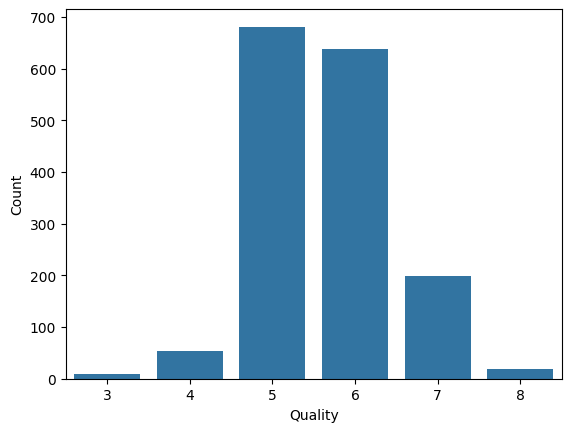

In [36]:
# plot count according to quality
sns.countplot(data=df,x='quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

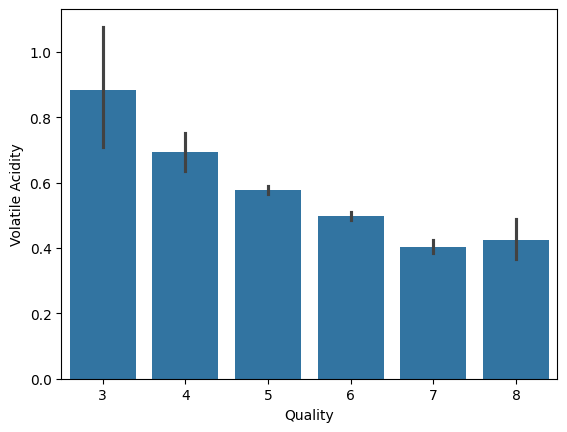

In [37]:
sns.barplot(x='quality', y='volatile acidity', data=df) # Create a bar plot of volatile acidity vs quality
plt.xlabel('Quality') # Set the x-axis label
plt.ylabel('Volatile Acidity') # Set the y-axis label
plt.show() # Display the plot

## Lower Volatile Acidity is associated with high quality

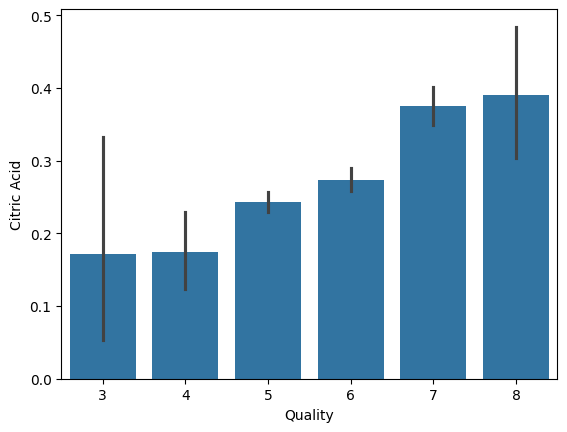

In [38]:
#Citric acid vs quality plot
sns.barplot(x='quality',y='citric acid',data=df)
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

## Lower Citric Acid value is associated with lower quality of wine

<Axes: >

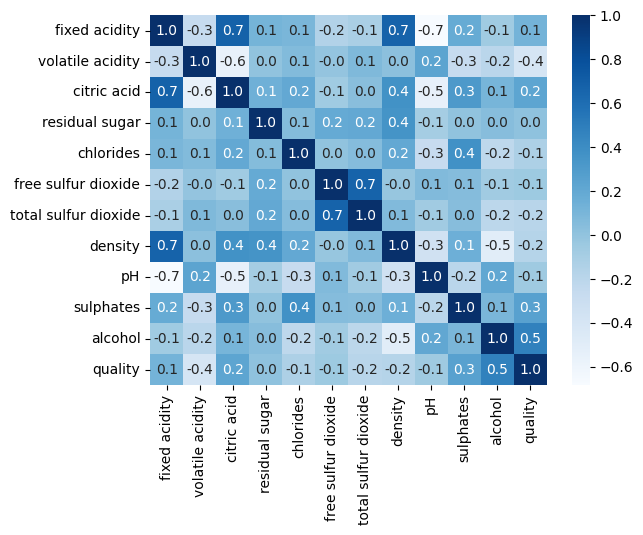

In [39]:
# correlation between columns/features
correlation=df.corr()
sns.heatmap(correlation,cmap='Blues',fmt='.1f',annot=True)

## We can drop the features that are correlated but number of features are limited in dataset so we don't drop any

In [40]:
# extract the the features and the output variable
y=df[['quality']]
x=df.drop(columns=['quality'])

In [41]:
#importing libraries for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)


## We normalize the data so that model converges easily and ensures fairness

In [42]:
y=y.to_numpy()
y=y.flatten()

In [43]:
# Converting output variable to 0 and 1 based on threshold
for i in range(len(y)):
    if(y[i]>=7):
        y[i]=1
    else:
        y[i]=0

## We set quality threshold above which wine is of good quality and below which it's not of good quality

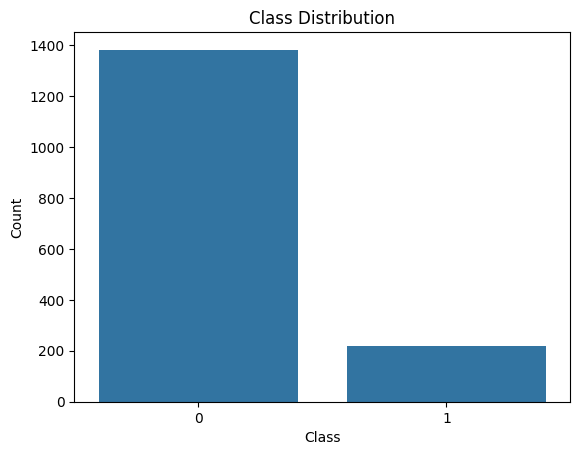

In [44]:
# plotting class distribution
sns.countplot(x=pd.Series(y))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## The classes are not balanced

In [45]:
#importing libraries for generating samples to balance classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
x_resampled, y_resampled = smote.fit_resample(x, y)




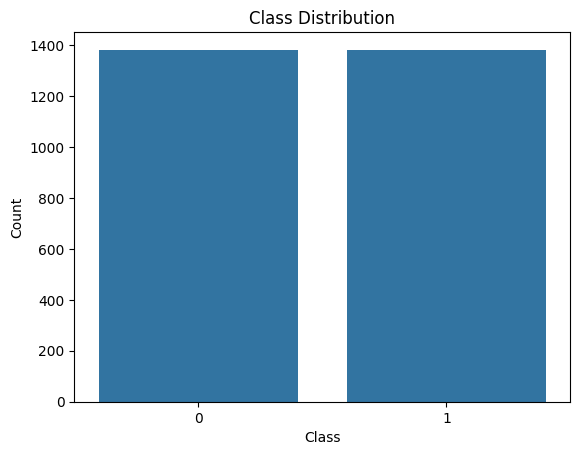

In [46]:
sns.countplot(x=pd.Series(y_resampled))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [47]:
# importing libraries to split data
from sklearn.model_selection import train_test_split


x_temp, x_test, y_temp, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)


Training Accuracy: 0.8124
Validation Accuracy: 0.8083
Testing Accuracy: 0.8083
Confusion Matrix (Test Data):
[[227  64]
 [ 42 220]]


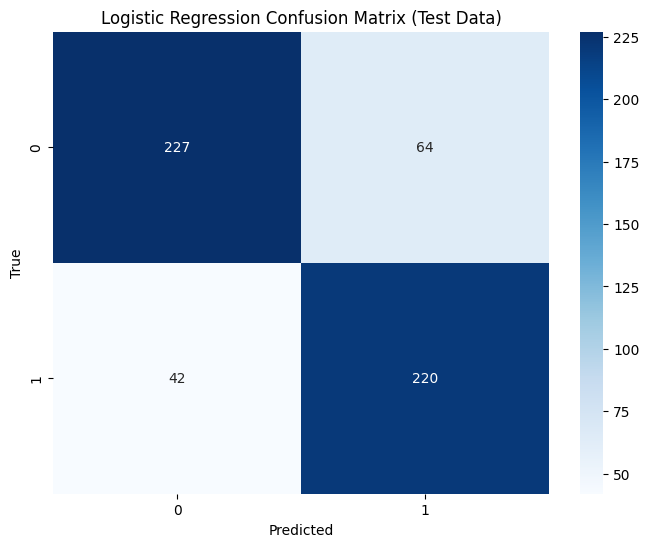

In [48]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Create and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on train, validation, and test sets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print confusion matrix
print(f"Confusion Matrix (Test Data):\n{conf_matrix}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix (Test Data)')
plt.show()


Decision Tree Training Accuracy: 1.0000
Decision Tree Validation Accuracy: 0.9024
Decision Tree Testing Accuracy: 0.8734
Decision Tree Confusion Matrix (Test Data):
[[250  41]
 [ 29 233]]


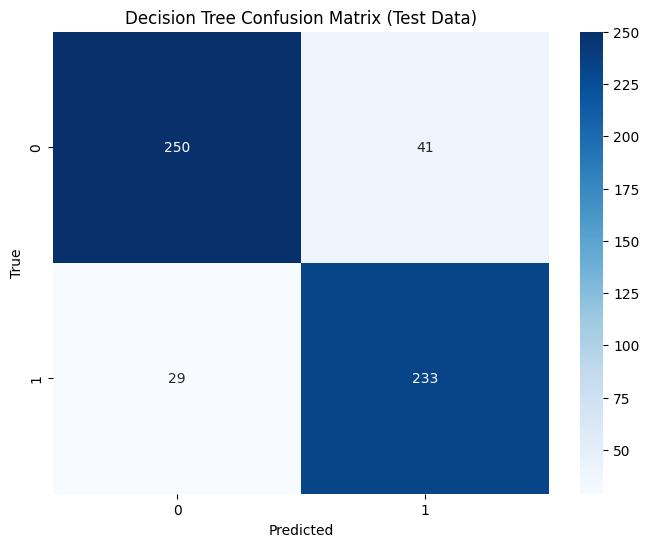

In [49]:
#Decision ree model
from sklearn.tree import DecisionTreeClassifier


# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predict on train, validation, and test sets
y_train_pred_dt = dt_model.predict(x_train)
y_val_pred_dt = dt_model.predict(x_val)
y_test_pred_dt = dt_model.predict(x_test)

# Calculate accuracies
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Calculate confusion matrix for test data
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)

# Print accuracies
print(f"Decision Tree Training Accuracy: {train_accuracy_dt:.4f}")
print(f"Decision Tree Validation Accuracy: {val_accuracy_dt:.4f}")
print(f"Decision Tree Testing Accuracy: {test_accuracy_dt:.4f}")

# Print confusion matrix
print(f"Decision Tree Confusion Matrix (Test Data):\n{conf_matrix_dt}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix (Test Data)')
plt.show()


Random Forest Training Accuracy: 1.0000
Random Forest Validation Accuracy: 0.9421
Random Forest Testing Accuracy: 0.9259
Random Forest Confusion Matrix (Test Data):
[[260  31]
 [ 10 252]]


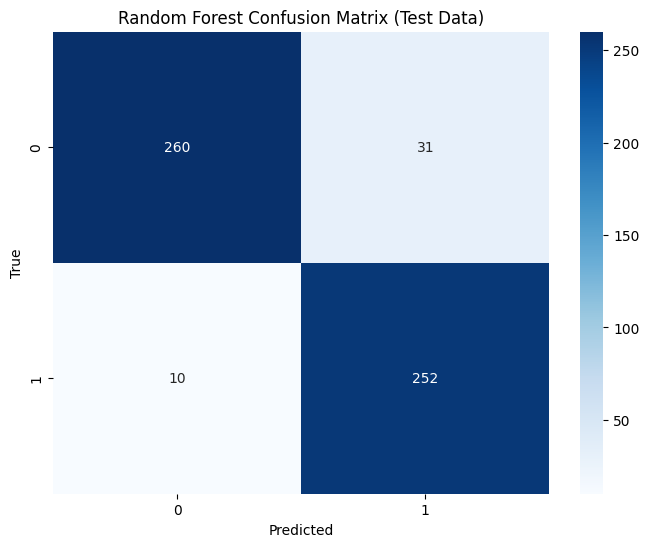

In [50]:
#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier


# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predict on train, validation, and test sets
y_train_pred_rf = rf_model.predict(x_train)
y_val_pred_rf = rf_model.predict(x_val)
y_test_pred_rf = rf_model.predict(x_test)

# Calculate accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate confusion matrix for test data
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Print accuracies
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")

# Print confusion matrix
print(f"Random Forest Confusion Matrix (Test Data):\n{conf_matrix_rf}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix (Test Data)')
plt.show()
